## Image Enhancement

#### Image Inverse

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip install pydicom

     |████████████████████████████████| 1.9MB 5.1MB/s 


In [4]:
%matplotlib inline
import skimage
print(skimage.__version__)

import numpy as np
import PIL as pil

from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat

from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage

from skimage import viewer
from skimage.viewer import ImageViewer
# https://scikit-image.org/docs/dev/user_guide/viewer.html

import skimage as skim
import skimage.io as skim_io
import skimage.transform as skim_tr
import skimage.util as skim_ut

import matplotlib.image as mpimg
import matplotlib.pylab as plt

from scipy.ndimage import affine_transform, zoom
from scipy import misc
import scipy.ndimage
import scipy 

0.16.2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Viewer requires Qt
  del sys.path[0]


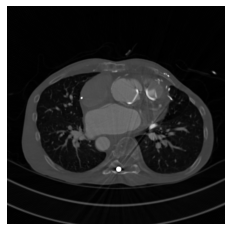

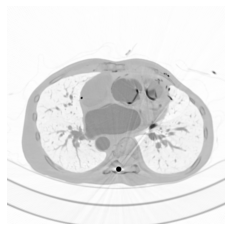

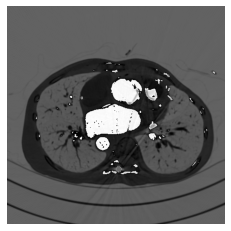

In [5]:
import cv2
import matplotlib.pyplot as plt

# Opening the image.
im = cv2.imread('/content/drive/MyDrive/DIP colab/imageinverse_input.png')
# Performing the inversion operation
im2 = 255 - im
# Saving the image as imageinverse_output.png in
# Figures folder.
im3 = 100 - im
# Saving the image as imageinverse_output.png in
# Figures folder.
plt.imshow(im)
plt.axis("off")
plt.show()
plt.imshow(im2)
plt.axis("off")
plt.show()
plt.imshow(im3)
plt.axis("off")
plt.show()

#### Power Law Transformation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


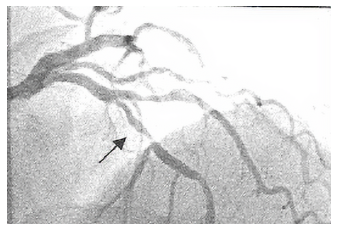

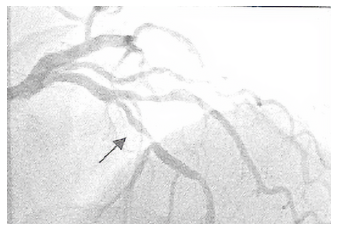

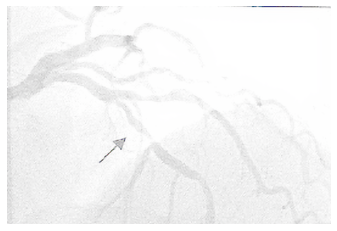

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Opening the image.
a = cv2.imread('/content/drive/MyDrive/DIP colab/angiogram1.png')
# gamma is initialized.
gamma = 0.5
# b is converted to type float.
b1 = a.astype(float)
# Maximum value in b1 is determined.
b3 = np.max(b1)
# b1 is normalized 
b2 = b1/b3
# gamma-correction exponent is computed.
b4 = np.log(b2)*gamma
# gamma-correction is performed.
c = np.exp(b4)*255.0
# c is converted to type int.
c1 = c.astype(int)
# Displaying c1
gamma1 = 0.2
# b is converted to type float.
b11 = a.astype(float)
# Maximum value in b11 is determined.
b31 = np.max(b11)
# b1 is normalized 
b21 = b11/b31
# gamma1-correction exponent is computed.
b41 = np.log(b21)*gamma1
# gamma1-correction is performed.
c111 = np.exp(b41)*255.0
# c is converted to type int.
c1111 = c111.astype(int)
# Displaying c1111
plt.axis("off")
plt.imshow(a)
plt.show()
plt.axis("off")
plt.imshow(c1)
plt.show()
plt.axis("off")
plt.imshow(c1111)
plt.show()

## Log Transformation

In [7]:
a = pil.Image.open("/content/drive/MyDrive/DIP colab/bse.png") # read the image, provide the correct path
print(a.width, a.height, a.mode, a.format, type(a))
# 453 340 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>
a.show() # display the image

978 664 RGBA PNG <class 'PIL.PngImagePlugin.PngImageFile'>


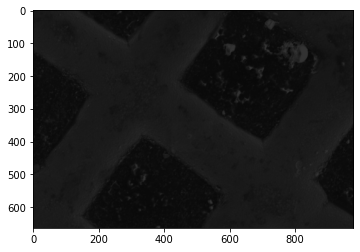

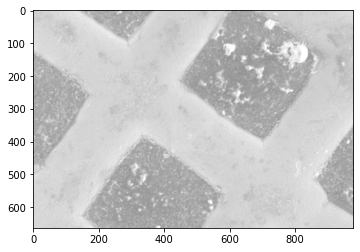

In [8]:

import cv2
import numpy, math
import matplotlib.pyplot as plt

# Opening the image.
a = cv2.imread('/content/drive/MyDrive/DIP colab/bse.png')
# a is converted to type float.
b1 = a.astype(float)
# Maximum value in b1 is determined.
b2 = numpy.max(b1)
# Performing the log transformation.
c = (255.0*numpy.log(1+b1))/numpy.log(1+b2)
# c is converted to type int.
c1 = c.astype(int)
# Saving c1 as logtransform_output.png.
plt.imshow(a)
plt.show()
plt.imshow(c1)
plt.savefig("/content/drive/MyDrive/DIP colab/OUTPUT/logtransform_output.png") # save the dark image
plt.show()
plt.close()

#### Histogram Equalization

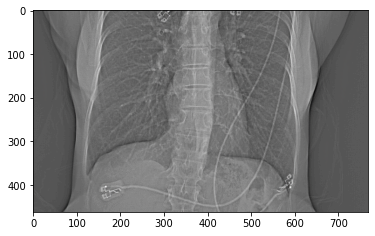

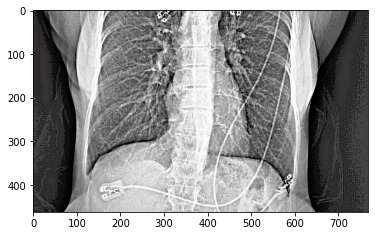

In [9]:

import cv2
import numpy as np 
import matplotlib.pyplot as plt

# Opening the image.
img1 = cv2.imread('/content/drive/MyDrive/DIP colab/hequalization_input.png')
# 2D array is converted to a 1D array.
fl = img1.flatten()
# Histogram and the bins of the image are computed.
hist,bins = np.histogram(img1,256,[0,255])
# cumulative distribution function is computed 
cdf = hist.cumsum()
# Places where cdf=0 is masked or ignored and 
# rest is stored in cdf_m.
cdf_m = np.ma.masked_equal(cdf,0)
# Histogram equalization is performed.
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max()-cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m
# The masked places in cdf_m are now 0.
cdf = np.ma.filled(cdf_m,0).astype('uint8')
# cdf values are assigned in the flattened array.
im2 = cdf[fl]
# im2 is 1D so we use reshape command to.
#  make it into 2D. 
im3 = np.reshape(im2,img1.shape)
# Saving im3 as hequalization_output.png
# in Figures folder 
plt.imshow(img1)
plt.show()
plt.imshow(im3)
plt.savefig("/content/drive/MyDrive/DIP colab/OUTPUT/mhequalization_output.png") # save the dark image
plt.show()

#### Contrast Limited Adaptive Histogram Equalization


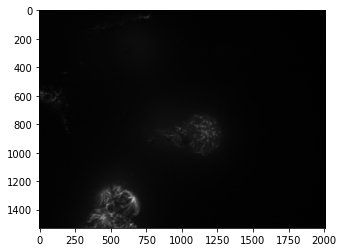

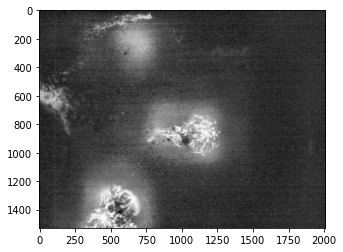

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


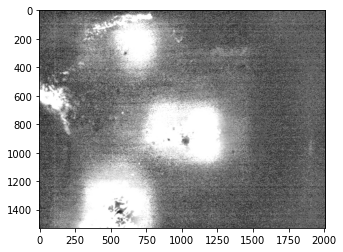

In [10]:
import cv2
from skimage.exposure import equalize_adapthist
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/DIP colab/embryo.png')
# Applying Clahe.
img2 = equalize_adapthist(img, clip_limit = 0.1)

# Rescaling img2 from 0 to 255.
img3 = img2*2
# Saving img3.
plt.imshow(img)
plt.show()
plt.imshow(img2)
plt.show()
plt.imshow(img3)
plt.savefig("/content/drive/MyDrive/DIP colab/OUTPUT/embryo_output.png") # save the dark image
plt.show()

#### Contrast Stretching

0 255


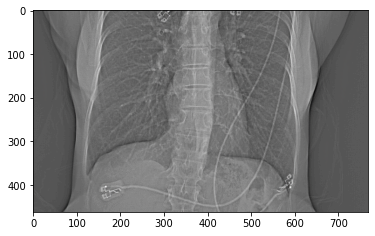

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


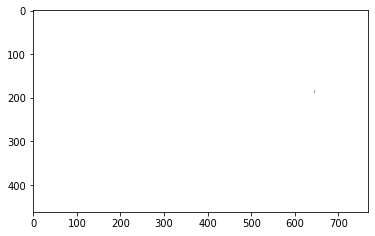

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


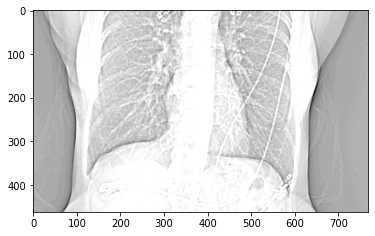

In [12]:
import cv2
import matplotlib.pyplot as plt

# Opening the image.
im = cv2.imread('/content/drive/MyDrive/DIP colab/hequalization_input.png')
# Finding the maximum and minimum pixel values
b = im.max()
a = im.min()
print(a,b)
# Converting im1 to float.
c = im.astype(float)
# Contrast stretching transformation.
im1 = 255.0*(c-a)/(b-a+0.0000001)
im2 = 2.0*(c-a)/(b-a+0.0000001)
# Saving im2 as contrast_output2.png in
# Figures folder 
plt.imshow(im)
plt.show() 
plt.imshow(im1)
plt.show() 
plt.imshow(im2)
plt.savefig("/content/drive/MyDrive/DIP colab/OUTPUT/contrast_output2.png") # save the dark image
plt.show() 

#### Sigmoid Correction

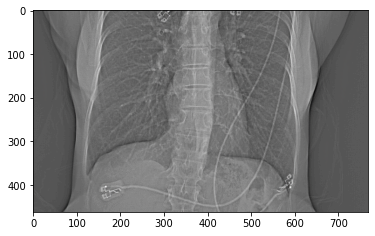

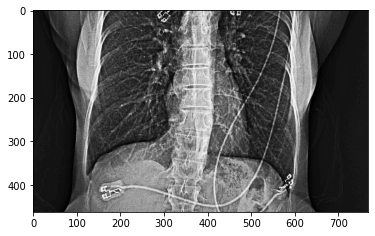

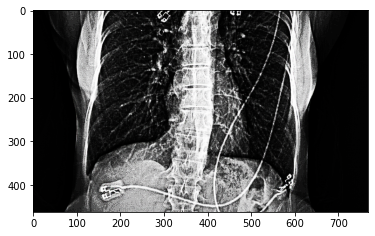

In [13]:
import cv2
from skimage.exposure import adjust_sigmoid
import matplotlib.pyplot as plt

# Reading the image.
img1 = cv2.imread('/content/drive/MyDrive/DIP colab/hequalization_input.png')
# Applying Sigmoid correction.
img2 =  adjust_sigmoid(img1, gain=15)
# Applying Sigmoid correction.
img3 =  adjust_sigmoid(img1, gain=30)
# Saving img2.
plt.imshow(img1)
plt.show() 
plt.imshow(img2)
plt.savefig("/content/drive/MyDrive/DIP colab/OUTPUT/hequalization_input_img2.png") # save the dark image
plt.show() 
plt.imshow(img3)
plt.savefig("/content/drive/MyDrive/DIP colab/OUTPUT/hequalization_input_img3.png") # save the dark image
plt.show() 

#### Local Contrast Normalization

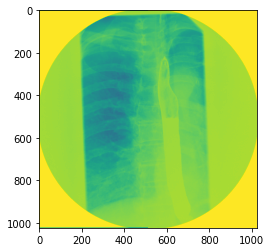

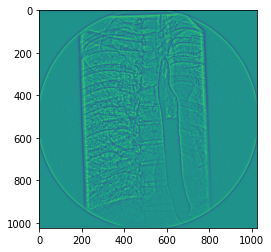

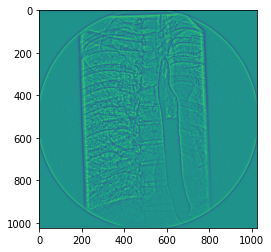

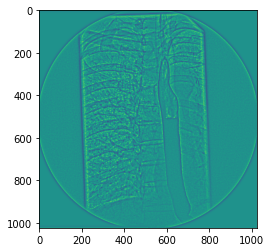

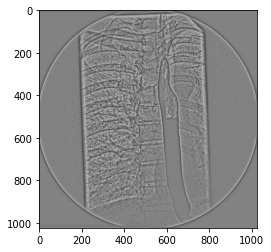

In [14]:
import pydicom
import numpy as np
import skimage.exposure as imexp
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from PIL import Image
import matplotlib.pyplot as plt

def localfilter(im, sigma=(10, 10,)):
    im_gaussian = gaussian_filter(im, sigma=sigma[0])
    d = im_gaussian-im
    s = np.sqrt(gaussian_filter(d*d, sigma=sigma[1]))
    # form an array where all elements have a value of mean(s)
    mean_array = np.ones(s.shape)*np.mean(s)
    # find element by element maximum between mean_array and s
    max_array = np.maximum(mean_array, s)
    y = d/(max_array+np.spacing(1.0))
    return y

file_name = "/content/drive/MyDrive/DIP colab/FluroWithDisplayShutter.dcm"
dfh = pydicom.read_file(file_name, force=True)
im = dfh.pixel_array
# convert to float and scale before applying filter
im = im.astype(np.float)
im1 = im/np.max(im)

sigma = (5, 5,)
im2 = localfilter(im, sigma) 
# rescale to 8-bit
im3 = 255*(im2-im2.min())/(im2.max()-im2.min())

im4 = Image.fromarray(im3).convert("L")
im5 = Image.fromarray(im3).convert("RGB")

plt.imshow(im1)
plt.show() 
plt.imshow(im2)
plt.show() 
plt.imshow(im3)
plt.show() 
plt.imshow(im4)
plt.show() 
plt.imshow(im5)
plt.savefig("/content/drive/MyDrive/DIP colab/OUTPUT/FluroWithDisplayShutteroutput.png") # save the dark image
plt.show() 